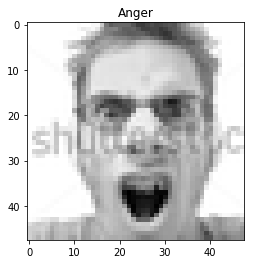

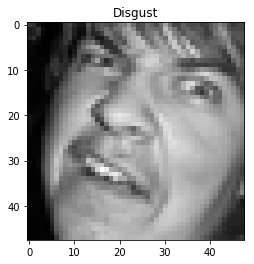

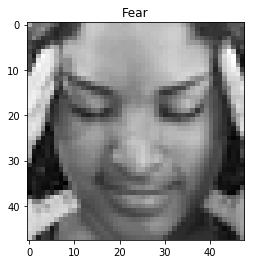

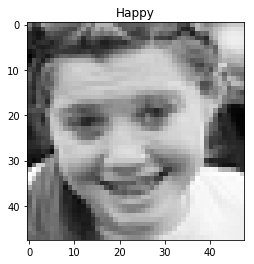

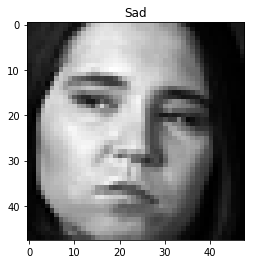

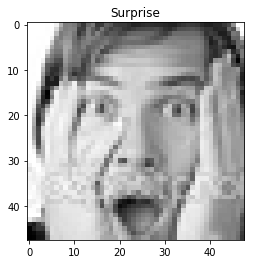

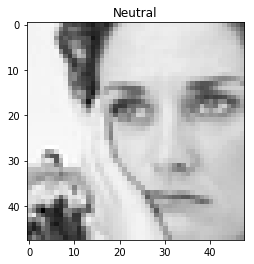

In [ ]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

from util import getData

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def main():
    X, Y = getData(balance_ones=False)

    while True:
        for i in range(7):
            x, y = X[Y==i], Y[Y==i]
            N = len(y)
            j = np.random.choice(N)
            plt.imshow(x[j].reshape(48, 48), cmap='gray')
            plt.title(label_map[y[j]])
            plt.show()
        prompt = input('Quit? Enter Y:\n')
        if prompt == 'Y':
            break


if __name__ == '__main__':
    main()


i: 0 cost: 2060.3184755634215 error: 0.881
best_validation_error: 0.881


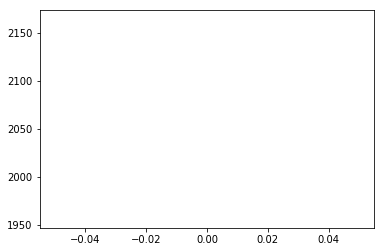

0.21406750614708292


In [4]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

from util import getData, softmax, cost, y2indicator, error_rate
from sklearn.utils import shuffle


class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=1e-7, reg=0., epochs=10, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D)
        self.b = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            pY = self.forward(X)

            # gradient descent step
            self.W -= learning_rate*(X.T.dot(pY - T) + reg*self.W)
            self.b -= learning_rate*((pY - T).sum(axis=0) + reg*self.b)

            if i % 10 == 0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)


def main():
    X, Y = getData()
    
    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    print(model.score(X, Y))
    # scores = cross_val_score(model, X, Y, cv=5)
    # print "score mean:", np.mean(scores), "stdev:", np.std(scores)

if __name__ == '__main__':
    main()
